# Assignment-11-Text Mining-Extract Amazon Reviews using Scrapy

## Step 1: 

If you are using conda, then you can install scrapy from the conda-forge using the following command.

#### conda install -c conda-forge scrapy

In case you are not using conda, you can use pip and directly install it in your system using the below command. 

#### !pip install scrapy

## Step 2:

After scrapy installation, open cmd prompt from conda.

To create a scrapy project use following command in cmd prompt.

#### scrapy startproject Scrape_AmazonReviews

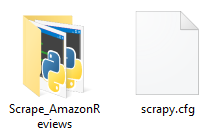

Once you have created the project, you will find "Scrape_AmazonReviews" file in root directory of your system. In which, one is a folder which contains your scrapy code, and other is your scrapy configuration file. Scrapy configuration helps in running and deploying the Scrapy project on a server.  

## Step 3:

Once we have the project in place, we need to create a spider. A spider is a chunk of python code that determines, how a web page will be scrapped. It is the main component that crawls different web pages and extracts content out of it. In our case, this will be the code chunk that will perform the task of visiting Amazon and scraping Amazon reviews. To create a spider, you can type in following command in same cmd prompt.

#### scrapy genspider amazon_review https://www.amazon.in/

This will create python file named "amazon_review.py" in your root directory, which you need to place inside "Scrape_AmazonReviews\Scrape_AmazonReviews\spiders" folder.

The "amazon_review.py" file contains below scrapy parser code:

In [ ]:
import scrapy


class AmazonReviewSpider(scrapy.Spider):
    name = 'amazon_review'
    allowed_domains = ['amazon.in']
    start_urls = ['http://amazon.in']

    def parse(self, response):
        pass

## Step 4:

Spider gets created within a "spiders" folder inside the project directory. Once you go into the "Scrape_AmazonReviews" folder/project, you will see a directory structure like the one below. 

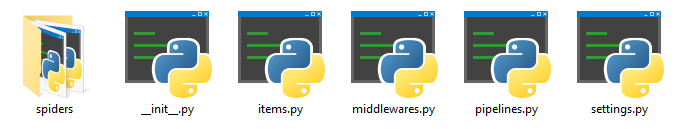

Scrapy files description:

Let us understand the "Scrape_AmazonReviews" Scrapy project structure and supporting files inside in a bit more detail. Main files inside Scrapy project directory includes, 

items.py 

Items are containers that will be loaded with the scraped data.


middleware.py

The spider middleware is a framework of hooks into Scrapy’s spider processing mechanism where you can plug custom functionality to process the responses that are sent to Spiders for processing and to handle the requests and items that are generated from spiders.

pipelines.py

After an item has been scraped by a spider, it is sent to the Item Pipeline which processes it through several components that are executed sequentially. Each item pipeline component is a Python class.

settings.py

It allows one to customize the behaviour of all Scrapy components, including the core, extensions, pipelines and spiders themselves.

spiders folder

The Spiders is a directory which contains all spiders/crawlers as Python classes. Whenever one runs/crawls any spider, then scrapy looks into this directory and tries to find the spider with its name provided by the user. Spiders define how a certain site or a group of sites will be scraped, including how to perform the crawl and how to extract data from their pages.

## Step 5:

Analyzing HTML structure of the webpage:

For Egs: https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber=
(Extraction of reviews from this web-page)

Now, before we actually start writing spider implementation in python for scraping Amazon reviews, we need to identify patterns in the target web page. Below is the page we are trying to scrape which contains different reviews about the product 'My First Library: Boxset of 10 Board Books for Kids' on Amazon. 

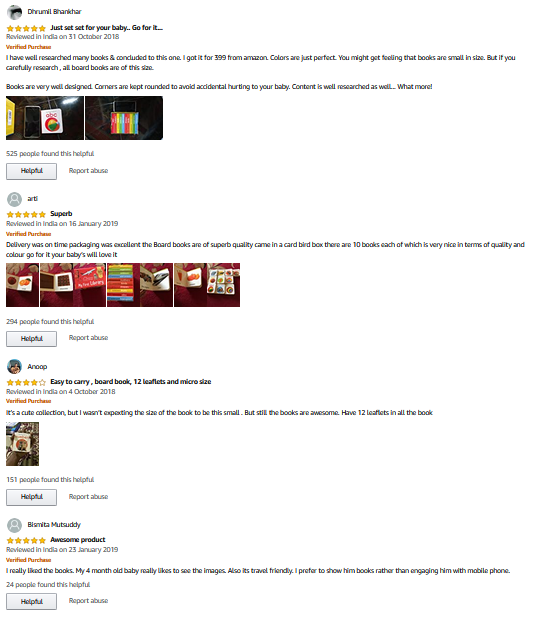

We start by opening the web page using the inspect-element feature in the browser. There you can see the HTML code of the web page. After a little bit of exploration, I found the following HTML structure which renders the reviews on the web page. 

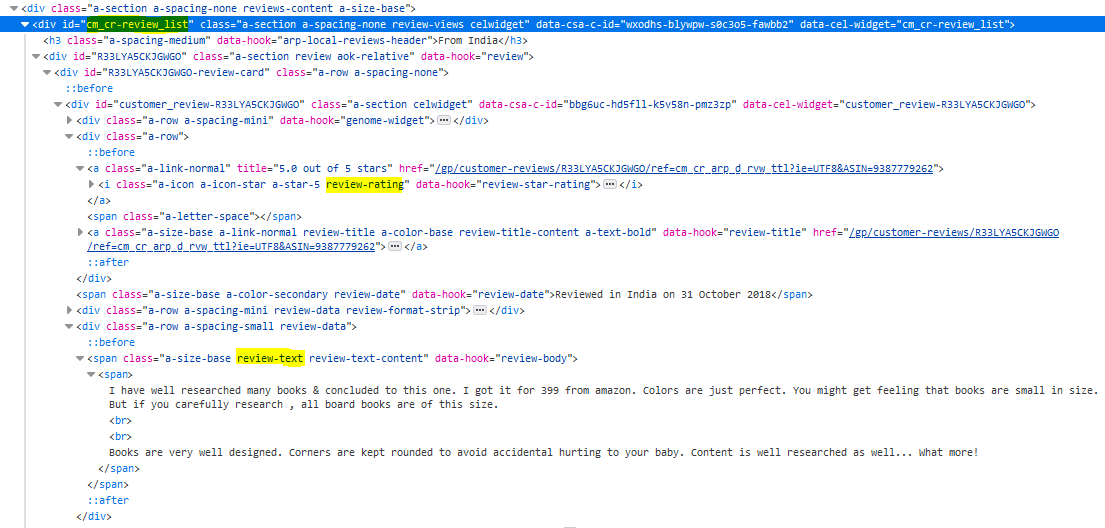

On the reviews page, there is a division with id "cm_cr-review_list". This division has multiple sub-division within which the review content resides. We are planning to extract both star rating and review text from the web page. Upon further inspection, we can see that every review subdivision is further divided into multiple blocks. One of these blocks contains required star ratings, and others includes the text of review needed. By looking more closely, we can easily see that star rating division is represented by the class attribute “review-rating” and review texts are represented by the class “review-text”. All we need to do now is just to pick these patterns up using our Scrapy parser.

## Step 6:

Then we need to define a parse function that gets fired up whenever our spider visits a new page. In the parse function, we need to identify patterns in the targeted page structure. Spider then looks for these patterns and extracts them out from the web page. 

Below is a code sample of Scrapy parser for scraping Amazon reviews. let's name the file as "extract_reiews.py" and save it in "Scrape_AmazonReviews\Scrape_AmazonReviews\spiders" folder.

In [ ]:
import scrapy

class AmazonReviewsSpider(scrapy.Spider):

    # Spider name
    name = 'amazon_reviews'

    # Domain names to scrape
    allowed_domains = ['amazon.in']

    # Base URL for the product reviews
    myBaseUrl = "https://www.amazon.in/product-reviews/9387779262/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&pageNumber="
    start_urls=[]

    # Creating list of urls to be scraped by appending page number a the end of base url
    for i in range(1,121):
        start_urls.append(myBaseUrl+str(i))

    # Defining a Scrapy parser
    def parse(self, response):
            data = response.css('#cm_cr-review_list')
            
            # Collecting product star ratings
            star_rating = data.css('.review-rating')

            # Collecting user reviews
            comments = data.css('.review-text')
            count = 0

            # Combining the results
            for review in star_rating:
                yield{'stars': 
                      ''.join(review.xpath('.//text()').extract()),
                      'comment': 
                          ''.join(comments[count].xpath(".//text()").extract())
                     }
                count=count+1

## Step 7:

Finally, we have successfully built our spider. The only task now left is to run this spider. We can run this spider by using the runspider command. It takes to input the spider file to run and the output file to store the collected results. In the case below, spider file is amazon_reviews.py and the output file is amazon_reviews.csv

To run this, open cmd prompt and type below command:

#### scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews.py -o extract_reviews.csv

The extracted "extract_reviews.csv" will get saved to default directory.

## Step 8:

The extracted reviews file is ready to use and can be open using python as below:

In [1]:
import pandas as pd
book=pd.read_csv('extract_reviews.csv')
book

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The book b...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Bought thi...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n It's very ...
3,3.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Thats the ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n My 2 and h...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Ordered fo...
1196,4.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice quali...
1197,2.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Overpriced...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice books...


## Step 9:

Testing our code for different product reviews. For egs: Bosch washing machine front load with weblink as follows:
https://www.amazon.in/Bosch-Inverter-Control-Automatic-Loading/product-reviews/B08SR372S7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=

Replace weblink in previous "extract_reiews.py" with this one and save file name as extract_reviews_test2.py in the same folder.

Then, run cmd and use following command in cmd prompt

#### scrapy runspider Scrape_AmazonReviews\Scrape_AmazonReviews\spiders\extract_reviews_test2.py -o extract_reviews_test2.csv 

And reading it using pandas python.

In [2]:
book2=pd.read_csv('extract_reviews_test2.csv')
book2

,stars,comment
0,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am total...
1,1.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Worst serv...
2,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n I am writi...
3,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Good one. ...
4,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n The best w...
...,...,...
1195,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Nice to re...
1196,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Very good ...
1197,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n Awesome..\...
1198,5.0 out of 5 stars,\n\n\n\n\n\n\n\n\n\n \n \n \n excellent\...
